In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
df = pd.read_csv('healthcare_dataset.csv/healthcare_dataset.csv')

In [8]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [9]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [15]:
df['Stay_Days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [11]:
# A patient is readmitted if the same Name appears more than once
readmit_map = df['Name'].value_counts()
df['Readmitted'] = df['Name'].map(readmit_map).apply(lambda x: 1 if x > 1 else 0)

In [12]:
high_risk_conditions = ['Cancer', 'Heart Disease', 'Diabetes', 'Stroke']
df['High_Risk_Condition'] = df['Medical Condition'].isin(high_risk_conditions).astype(int)

In [13]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 40, 60, 100], labels=['Young', 'Middle', 'Senior'])
df['Is_Senior'] = (df['Age'] > 60).astype(int)

In [16]:
features = [
    'Age', 'Stay_Days', 'Billing Amount',
    'High_Risk_Condition', 'Is_Senior',
    'Gender', 'Admission Type', 'Blood Type', 'Insurance Provider'
]

X = df[features].copy()
y = df['Readmitted']

In [17]:
# Encode categorical variables
le_dict = {}
for col in ['Gender', 'Admission Type', 'Blood Type', 'Insurance Provider']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

In [18]:
X.fillna(X.median(numeric_only=True), inplace=True)

In [19]:
scaler = StandardScaler()
numeric_cols = ['Age', 'Stay_Days', 'Billing Amount']
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [21]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [26]:
os.makedirs('figures', exist_ok=True)
os.makedirs('excel_files', exist_ok=True)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      8897
           1       0.00      0.00      0.00      2203

    accuracy                           0.80     11100
   macro avg       0.40      0.50      0.44     11100
weighted avg       0.64      0.80      0.71     11100


ROC AUC Score: 0.496


c:\Users\akeem\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\akeem\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\akeem\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

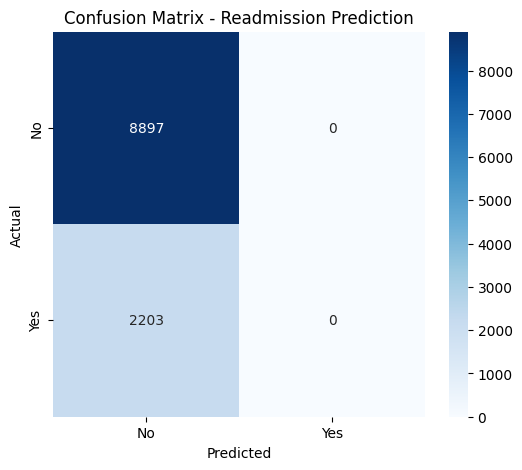

In [24]:
# 5. EVALUATION
# -------------------------------
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print(f"\nROC AUC Score: {roc_auc_score(y_test, y_prob):.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Readmission Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('figures/readmission_confusion.png')
plt.show()

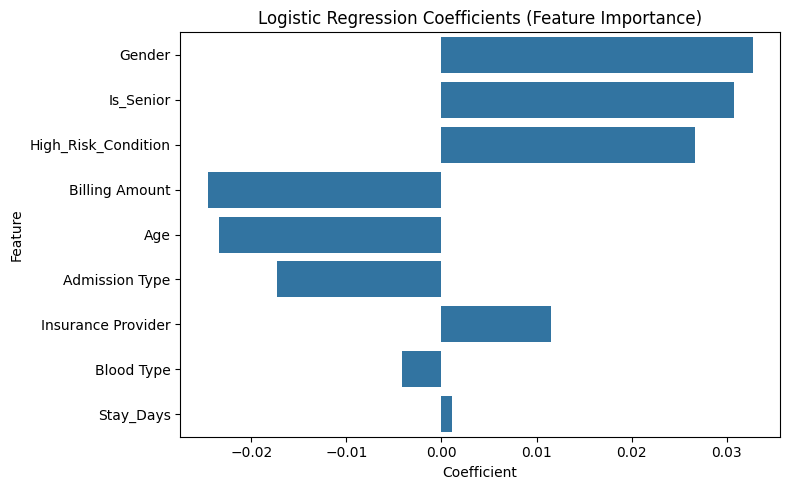

In [25]:
# Feature Importance
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Logistic Regression Coefficients (Feature Importance)')
plt.tight_layout()
plt.savefig('figures/readmission_features.png')
plt.show()

In [27]:
with pd.ExcelWriter('excel_files/readmission_analysis.xlsx') as writer:
    # Predictions
    results = pd.DataFrame({
        'Name': df.loc[X_test.index, 'Name'],
        'Actual': y_test,
        'Predicted_Prob': y_prob,
        'Predicted': y_pred
    })
    results.to_excel(writer, sheet_name='Predictions', index=False)

    # Model Summary
    summary = pd.DataFrame({
        'Metric': ['Accuracy', 'ROC AUC', 'Readmission Rate'],
        'Value': [
            (y_pred == y_test).mean(),
            roc_auc_score(y_test, y_prob),
            y.mean()
        ]
    })
    summary.to_excel(writer, sheet_name='Summary', index=False)

    # Feature Coefficients
    coef_df.to_excel(writer, sheet_name='Feature_Importance', index=False)

print("Analysis complete! Check 'excel_files/' and 'figures/' for outputs.")

Analysis complete! Check 'excel_files/' and 'figures/' for outputs.
